In [1]:
{}
import os
import numpy as np
import pprint
import pickle
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from pathlib import Path
from collections import deque

In [2]:
# read in the matrices to inspect

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v1'

if p.exists():
    a_matrix = np.load(p / 'matrix_A1.npy')
    b_matrix = np.load(p / 'matrix_B1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')


In [3]:
print(a_matrix)
print(a_matrix.shape)
print(b_matrix)
print(b_matrix.shape)
print(c_matrix)
print(d_matrix)

[[ 0.98154062  0.00392863  0.01305596  0.00994301 -0.00620773 -0.03393096
   0.01451968  0.00945787]
 [ 0.20462503  0.88923136  0.03718339  0.00138765  0.10304766 -0.23615481
  -0.0292271   0.10253744]
 [ 0.84337744 -0.25996913  0.81063378  0.08407197  0.41340258  0.17511514
  -0.18206814  0.07113234]
 [-1.13376645  0.43389347  0.09257787  0.79322779  0.10973279  0.24918882
   0.03100918  0.02343908]
 [ 0.9180556  -0.39322804 -0.38310123 -0.19692349  0.77337838  0.26735187
  -0.06651764 -0.00315444]
 [-0.04663159  0.20924382  0.2769302   0.45830949 -0.06402696  0.43991173
  -0.40245776 -0.25000864]
 [ 0.56880797 -0.12315229 -0.17101381  0.04237984 -0.01335673  0.26500754
   0.43938171  0.12977529]
 [-0.50665319  0.6132963   0.11002295  0.51078421  0.28707335 -0.2386131
  -0.34388066 -0.44998195]]
(8, 8)
[[ 1.06739218e-06  3.10049417e-07  8.64458389e-07  2.65407124e-06
   1.88540480e-05 -1.84875570e-04  1.20371572e-04 -2.13067533e-05
   1.05997270e-05 -1.57168952e-03 -2.30996442e-08 -9.

In [4]:
# Version 3

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v3'

if p.exists():
    a_matrix = np.load(p / 'matrix_AK1.npy')
    b_matrix = np.load(p / 'matrix_BK1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')
    
display(a_matrix)
display(b_matrix)
_x = np.array([5, 5, 5])
_u = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

print(a_matrix.shape)
print(_x.shape)
    
print(b_matrix.shape)
print(_u.shape)

x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled}")



array([[-0.58772656, -0.05484999, -0.03070292],
       [-1.25653591, -0.15766376, -0.0704444 ],
       [ 1.44156839, -0.54128782, -0.13929845]])

array([[-2.76733146e-04, -4.00729107e-04, -3.75813866e-03,
         1.03071702e-06, -3.56493033e-08,  7.21066236e-08,
         1.04989708e-06,  1.67032337e-07,  5.42159590e-05,
         3.24855873e-04],
       [ 3.48147623e-04, -7.79597632e-04, -3.34187839e-03,
        -2.17535687e-06, -9.64016812e-09,  3.88379219e-10,
        -3.85899108e-07,  1.11176457e-07,  2.11183010e-03,
        -2.85055526e-04],
       [-3.64584550e-03,  1.10863789e-04,  7.41396884e-03,
        -1.44607323e-05,  2.62378883e-08, -1.52882841e-07,
        -4.94227931e-06,  1.68469233e-06,  3.47484698e-04,
         4.17967736e-03]])

(3, 3)
(3,)
(3, 10)
(10,)
x_next is [-3.38666858 -7.43296546  3.84685217]
y_modeled is [-703.14547952]


       Type                Name
       ----                ----
      _tvp:             TDryBul
      _tvp:             HGloHor
      _tvp:     occupancy_ratio
      _tvp:     TSetpoint_Lower
      _tvp:     TSetpoint_Upper
      _tvp:            ElecCost
        _u:       heating_power
        _u:       cooling_power
        _u:     t_heat_setpoint
        _u:     t_cool_setpoint
        _x:            t_indoor
        _x:          t_indoor_1
        _x:          t_indoor_2
      _aux:         total_power
      _aux:                cost


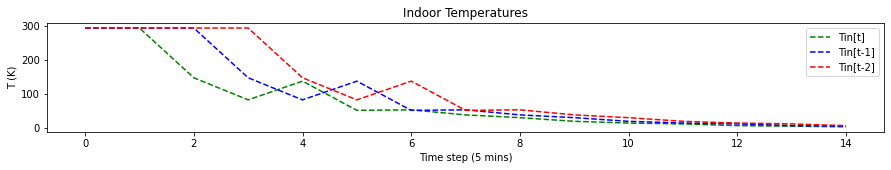

In [20]:
    
    
# display(results['mpc'].data_fields)
# display(results['mpc']['_x'].__class__)

# TODO -- deal with time
# print(results['mpc']['_time'])


# test the y_meas calculation


# display(results['mpc'].keys())

# dir(results['mpc'].result_queries)

The x_matrix init: [-0.8194 -0.029  -0.006 ]


Text(0.5, 0, 'Time step (5 mins)')

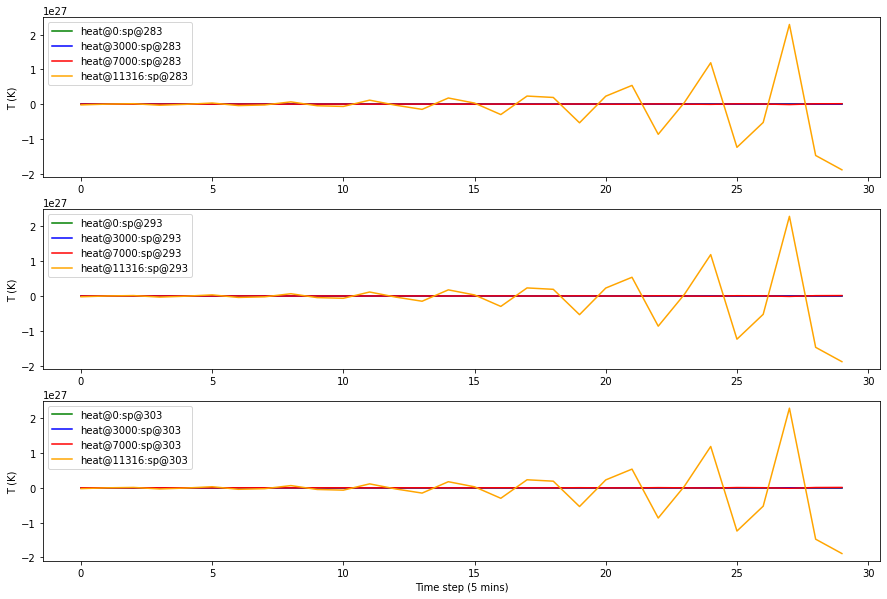

In [13]:
## Test if the temperature increases with the x's and u's given in the MPC

# construct the x and u matrix
t_init = 0
# _x = results['mpc']['_x', 'x'][t_init]s
_x = np.array([-0.8194, -0.029, -0.006])
print(f"The x_matrix init: {_x}")

sims = {}

t_heat_setpoint_range = [283, 293, 303]
heating_range = [0, 3000, 7000, 11316]
for t_heat_setpoint in t_heat_setpoint_range:
    for heat in heating_range:
        index = f"{t_heat_setpoint}_{heat}"
        sims[index] = {}
        sims[index]["temperature"] = []
        temps = deque([293, 293, 293])

        t_cool_setpoint = 298
        # var to store results

        for t in range(0,30):

        #     _u = np.array([
        #         results['mpc']['_tvp', 'TDryBul'][t][0],
        #         results['mpc']['_tvp', 'HGloHor'][t][0],
        #         results['mpc']['_tvp', 'occupancy_ratio'][t][0],
        #         results['mpc']['_u', 't_heat_setpoint'][t][0] - results['mpc']['_x', 't_indoor'][t][0],
        #         results['mpc']['_x', 't_indoor'][t][0] - results['mpc']['_u', 't_cool_setpoint'][t][0],
        #         results['mpc']['_tvp', 'TDryBul'][t][0] - results['mpc']['_x', 't_indoor_1'][t][0],
        #         results['mpc']['_u', 'heating_power'][t][0],
        #         results['mpc']['_u', 'cooling_power'][t][0],
        #         results['mpc']['_x', 't_indoor_1'][t][0],
        #         results['mpc']['_x', 't_indoor_1'][t][0] - results['mpc']['_x', 't_indoor_2'][t][0],
        #     ])

            t_indoor = temps.popleft()
            t_indoor_1 = temps[0]
            t_indoor_2 = temps[1]

            # force some of these variables as fixed
            _u = np.array([
                273, # freezing outside
                0,  # no sun
                t_indoor_1, # previous value of the temperature
                t_heat_setpoint - t_indoor, # heating term
                11316,  # full heating power
                0,      # no cooling
                t_indoor - t_cool_setpoint, #cooling term 
                5,  # full occupancy
                t_indoor_1 - t_indoor_2, #delta of temperatures 
                273 - t_indoor_1 #infiltration term 
            ])


        #     print(_u)
        #     display(_x)
        #     print(a_matrix.shape)
        #     print(_x.shape)

        #     print(b_matrix.shape)
        #     print(_u.shape)
            x_next = a_matrix @ _x + b_matrix @ _u
            y_modeled = c_matrix @ _x + d_matrix @ _u
        #     display(x_next)
        #     display(y_modeled)
            _x = x_next

            temps.append(y_modeled[0])        
            sims[index]["temperature"].append(y_modeled[0])

        #     print(temps)
#             print(f"Indoor air temperature do-mpc: {results['mpc']['_x', 't_indoor'][t][0]:.2f}, y_modeled: {y_modeled[0]:.2f}. H_sp: {t_heat_setpoint} C_sp: {t_cool_setpoint} ")


fig = plt.figure(figsize=(15, 10))
colors = ['green', 'blue', 'red', 'orange']
for i_1, t_heating_setpoint in enumerate(t_heat_setpoint_range):
    fig.add_subplot(len(t_heat_setpoint_range), 1, i_1+1)

    for i_2, heat in enumerate(heating_range):
        index = f"{t_heat_setpoint}_{heat}"
        plt.plot(sims[index]["temperature"], colors[i_2], label=f"heat@{heat}:sp@{t_heating_setpoint}")

    plt.ylabel('T (K)')
    plt.legend()
#     plt.title('Indoor Temperatures')

plt.xlabel('Time step (5 mins)')



In [5]:
# Version 4

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v4'

if p.exists():
    a_matrix = np.load(p / 'matrix_AK1.npy')
    b_matrix = np.load(p / 'matrix_BK1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')
    
display(a_matrix)
display(b_matrix)

# Test with random data
_x = np.array([-0.2])
_u = np.array([271.92, 
               0, 
               0,  # t_heat - t_in
               0,  # t_in - t_cool,
               273 - 293,])

print(a_matrix.shape)
print(_x.shape)
print(b_matrix.shape)
print(_u.shape)

x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled}")




array([[0.87619072]])

array([[-9.35528725e-05,  1.80072462e-06, -5.55892401e-06,
        -2.75942462e-06,  8.15130221e-05]])

(1, 1)
(1,)
(1, 5)
(5,)
x_next is [-0.2023073]
y_modeled is [268.07129334]


The x_matrix init: [-0.2]


NameError: name 'i_2' is not defined

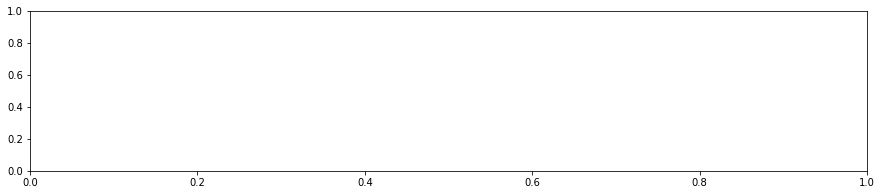

In [6]:
## Test if the temperature increases with the x's and u's given in the MPC

# construct the x and u matrix
t_init = 0
# _x = results['mpc']['_x', 'x'][t_init]

print(f"The x_matrix init: {_x}")

sims = {}

t_heat_setpoint_range = [283, 293, 303]
for t_heat_setpoint in t_heat_setpoint_range:
    _x = np.array([-0.200731])
    temps = deque([293, 293, 293])
    t_cool_setpoint = 303

    index = f"{t_heat_setpoint}"
    sims[index] = {}
    sims[index]["temperature"] = []
    sims[index]["heat_setpoint"] = []
    
    # var to store results

    for t in range(0,500):

    #     _u = np.array([
    #         results['mpc']['_tvp', 'TDryBul'][t][0],
    #         results['mpc']['_tvp', 'HGloHor'][t][0],
    #         results['mpc']['_tvp', 'occupancy_ratio'][t][0],
    #         results['mpc']['_u', 't_heat_setpoint'][t][0] - results['mpc']['_x', 't_indoor'][t][0],
    #         results['mpc']['_x', 't_indoor'][t][0] - results['mpc']['_u', 't_cool_setpoint'][t][0],
    #         results['mpc']['_tvp', 'TDryBul'][t][0] - results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_u', 'heating_power'][t][0],
    #         results['mpc']['_u', 'cooling_power'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0] - results['mpc']['_x', 't_indoor_2'][t][0],
    #     ])

        t_indoor = temps.popleft()
        t_indoor_1 = temps[0]
        t_indoor_2 = temps[1]

        if t >= 250:
            t_heat_setpoint = 291
            
        # force some of these variables as fixed
        _u = np.array([
            273, #Outside Air Temperature 
            0, # GLobal Horizontal Irradiance  
            t_heat_setpoint - t_indoor, # heating term,
            t_indoor - t_cool_setpoint, #cooling term 
            273 - t_indoor_1   #infiltration term 
        ])

    #     print(_u)
    #     display(_x)
    #     print(a_matrix.shape)
    #     print(_x.shape)

    #     print(b_matrix.shape)
    #     print(_u.shape)
        x_next = a_matrix @ _x + b_matrix @ _u
        y_modeled = c_matrix @ _x + d_matrix @ _u
    #     display(x_next)
    #     display(y_modeled)
        _x = x_next

        temps.append(y_modeled[0])        
        sims[index]["temperature"].append(y_modeled[0])
        sims[index]["heat_setpoint"].append(t_heat_setpoint)

    #     print(temps)
#             print(f"Indoor air temperature do-mpc: {results['mpc']['_x', 't_indoor'][t][0]:.2f}, y_modeled: {y_modeled[0]:.2f}. H_sp: {t_heat_setpoint} C_sp: {t_cool_setpoint} ")


fig = plt.figure(figsize=(15, 10))
colors = ['green', 'blue', 'red', 'orange']
for i_1, t_heat_setpoint in enumerate(t_heat_setpoint_range):
    fig.add_subplot(len(t_heat_setpoint_range), 1, i_1+1)
    index = f"{t_heat_setpoint}"
    plt.plot(sims[index]["temperature"], colors[i_2], label=f"sp@{t_heat_setpoint}")
    plt.plot(sims[index]["heat_setpoint"], 'r--', label="setpoint")

    plt.ylabel('T (K)')
    plt.legend()
#     plt.title('Indoor Temperatures')

plt.xlabel('Time step (5 mins)')

Text(0.5, 0, 'Time step (5 mins)')

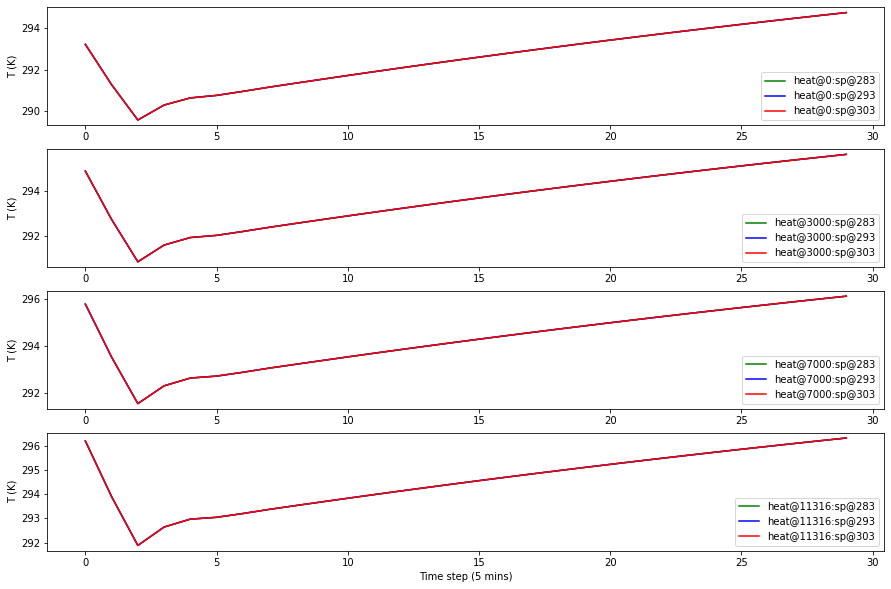

In [14]:
# plot the setpoints with differeting heats
fig = plt.figure(figsize=(15, 10))
for i_1, heat in enumerate(heating_range):
    fig.add_subplot(len(heating_range), 1, i_1+1)

    for i_2, t_heating_setpoint in enumerate(t_heat_setpoint_range):
        index = f"{t_heat_setpoint}_{heat}"
        plt.plot(sims[index]["temperature"], colors[i_2], label=f"heat@{heat}:sp@{t_heating_setpoint}")
    
    plt.ylabel('T (K)')
    plt.legend()
plt.xlabel('Time step (5 mins)')



A: [[ 1.99470455e-02  1.06557385e-04  8.00146879e-05 -5.02915041e-07
  -2.51215615e-07 -5.56115136e-07  7.94102930e-03]
 [ 7.26160508e-02 -4.14222217e-03  1.24354894e-03 -5.99216984e-06
  -2.38241818e-06 -9.08784005e-06  9.16660523e-02]
 [ 4.53617945e-02  2.06533332e-03 -8.01009354e-05  3.58198107e-07
   4.17202935e-07 -4.01052811e-06  1.21736014e-02]
 [-1.33434621e-02 -4.22728579e-04 -1.60383412e-03 -8.73537992e-06
  -1.11194537e-05 -2.03650949e-05  3.30043086e-01]
 [ 1.57929645e-02 -8.30702217e-03  2.45278847e-03 -1.07965553e-05
  -9.47254684e-06  3.10008990e-05 -5.71785157e-03]
 [-5.78506664e-03  3.78414744e-03 -3.39550710e-03  8.38649859e-08
  -1.13676452e-05  4.61777221e-05 -3.28033499e-02]
 [-3.83020431e-01  4.07966298e-03 -2.17535562e-03  7.87585169e-06
   7.36414959e-07  3.92075552e-05 -2.15291146e-01]]
B: [[ 1.99470455e-02  1.06557385e-04  8.00146879e-05 -5.02915041e-07
  -2.51215615e-07 -5.56115136e-07  7.94102930e-03]
 [ 7.26160508e-02 -4.14222217e-03  1.24354894e-03 -5.9921

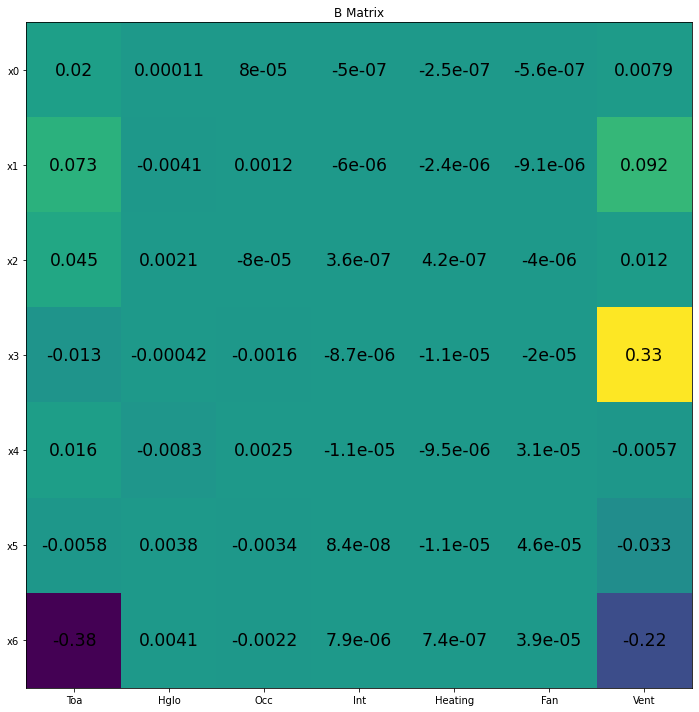

In [38]:
# Version 5

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v5'

if p.exists():
    a_matrix = np.load(p / 'matrix_A1.npy')
    b_matrix = np.load(p / 'matrix_B1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')
    
print(f"A: {b_matrix}")
print(f"B: {b_matrix}")

# Test with random data
_x = np.array((
            [2.46448],[-2.80786],[0.435631],[0.754336],[-3.03051],[-3.59742],[10.7656]
            ))
_u = np.array([273, # T_OA (K)  - freezing outside
               0,  # Horizontal Global Irradiance (W) 
               0,  # No occupants [ 0 - 6]
               1000,  # Internal gains convective flow (W), ?  [ 0 - 3000]
               13000, # Heating Power (W), [0 - 6000]
               500,  # Fan Power (W), ? [0 - 500]
               0.175,    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside ai
              ])

labels_y = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'] 
labels = ['Toa', 'Hglo', 'Occ', 'Int', 'Heating', 'Fan', 'Vent']
print(a_matrix.shape)
print(b_matrix.shape)
print(c_matrix.shape)
print(d_matrix.shape)
print('here')
print(b_matrix @ _u)
x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled[0][0]}")

# Plot the b_matrix to see the sensitivities of th e input variables
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(b_matrix)


ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels_y)))
# # ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels_y)

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels_y)):
        text = ax.text(j, i, f"{b_matrix[i, j]:,.2}",
                       ha="center", va="center", color="black", size='xx-large')

ax.set_title("B Matrix")
fig.tight_layout()
plt.show()




The x_matrix init: [[ 1.16828678e+00 -1.35477702e+00 -4.86906717e-02  2.75358349e+00
   1.36938204e+00  2.40132415e+00  2.04651882e+01]
 [-2.54015795e+01 -9.79990757e+01 -6.04183382e+01  2.02130307e+01
  -1.96153556e+01  1.00772797e+01  5.29838732e+02]
 [-1.91114089e+01 -6.57184762e+01 -4.15919146e+01  1.01728409e+01
  -1.53966950e+01  3.66576206e+00  3.37348854e+02]
 [ 1.83715056e+01  5.82526039e+01  3.76077998e+01 -6.68666937e+00
   1.51928703e+01 -1.11864145e+00 -2.86647189e+02]
 [ 1.42653001e+01  3.44221815e+01  2.39877931e+01  1.60028627e+00
   1.26587401e+01  4.41450361e+00 -1.39898600e+02]
 [ 3.75038241e+01  5.68701876e+01  4.68450179e+01  2.53355102e+01
   3.59602707e+01  2.80393588e+01 -1.10614035e+02]
 [ 6.84664072e+01  6.50693481e+02  3.49298474e+02 -2.97359722e+02
   2.20612781e+01 -2.16071675e+02 -4.38452383e+03]]


Text(0.5, 0, 'Time step (5 mins)')

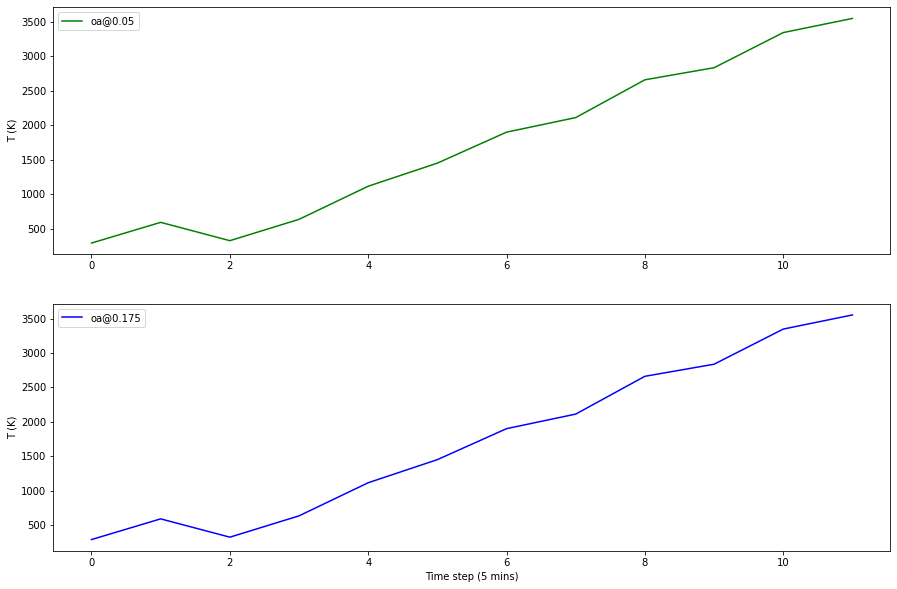

In [58]:
## Test if the temperature increases with the x's and u's given in the MPC

# construct the x and u matrix
t_init = 0
# _x = results['mpc']['_x', 'x'][t_init]

print(f"The x_matrix init: {_x}")

sims = {}

heating_power_range = [0, 3000, 6000]
oa_vent_range = [0.05, 0.175]
for oa_vent in oa_vent_range:
    _x = np.array((
#             [2.46448], [-2.80786], [0.435631], [0.754336], [-3.03051], [-3.59742], [10.7656]
            [2.32145], [-0.334731], [0.0517163], [-0.0580721], [0.0264939], [-0.0292909], [0.00496072]
            ))

    index = f"{oa_vent}"
    sims[index] = {}
    sims[index]["temperature"] = []
    
    # var to store results

    for t in range(0,12):

    #     _u = np.array([
    #         results['mpc']['_tvp', 'TDryBul'][t][0],
    #         results['mpc']['_tvp', 'HGloHor'][t][0],
    #         results['mpc']['_tvp', 'occupancy_ratio'][t][0],
    #         results['mpc']['_u', 't_heat_setpoint'][t][0] - results['mpc']['_x', 't_indoor'][t][0],
    #         results['mpc']['_x', 't_indoor'][t][0] - results['mpc']['_u', 't_cool_setpoint'][t][0],
    #         results['mpc']['_tvp', 'TDryBul'][t][0] - results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_u', 'heating_power'][t][0],
    #         results['mpc']['_u', 'cooling_power'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0] - results['mpc']['_x', 't_indoor_2'][t][0],
    #     ])
            
        _u = np.array([273, # T_OA (K)  - freezing outside
               0,  # Horizontal Global Irradiance (W) 
               0,  # No occupants [ 0 - 6]
               1000,  # Internal gains convective flow (W), ?  [ 0 - 3000]
               0, # Heating Power (W), [0 - 6000]
               0,  # Fan Power (W), ? [0 - 500]
               oa_vent,    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside air
              ])

        x_next = a_matrix @ _x + b_matrix @ _u
        y_modeled = c_matrix @ _x + d_matrix @ _u
        _x = x_next

#         temps.append(y_modeled[0][0])        
#         print(temps)xit
        
        sims[index]["temperature"].append(y_modeled[0][0])

        # print(f"Indoor air temperature do-mpc: {results['mpc']['_x', 't_indoor'][t][0]:.2f}, y_modeled: {y_modeled[0]:.2f}. H_sp: {t_heat_setpoint} C_sp: {t_cool_setpoint} ")


fig = plt.figure(figsize=(15, 10))
colors = ['green', 'blue', 'red', 'orange']
for i_1, oa_vent in enumerate(oa_vent_range):
    fig.add_subplot(len(oa_vent_range), 1, i_1+1)
    index = f"{oa_vent}"
    plt.plot(sims[index]["temperature"], colors[i_1], label=f"oa@{oa_vent}")
#     plt.plot(sims[index]["heat_setpoint"], 'r--', label="setpoint")

    plt.ylabel('T (K)')
    plt.legend()
#     plt.title('Indoor Temperatures')

plt.xlabel('Time step (5 mins)')

In [38]:
_x = np.array((
#             [2.46448], [-2.80786], [0.435631], [0.754336], [-3.03051], [-3.59742], [10.7656]
            [2.32145], [-0.334731], [0.0517163], [-0.0580721], [0.0264939], [-0.0292909], [0.00496072]
            ))
y_modeled = c_matrix @ _x + d_matrix @ _u
y_modeled

display(a_matrix)
display(a_matrix.shape)
display(_x)
display(_x.shape)
display(c_matrix)
display(c_matrix.shape)

array([[-1.34196821e+00,  5.84342014e-02,  8.64388369e-02,
         8.85810059e-03,  6.79758427e-03,  4.79967436e-03,
         1.27848963e-03],
       [-8.38247473e+00,  1.11198102e-01,  1.93752232e+00,
         6.22713272e-02,  1.33373050e-01,  6.70627382e-02,
         2.52798880e-02],
       [-5.38352885e+00,  5.76956003e-01,  5.42877295e-01,
         3.09308525e-03,  6.22443596e-04,  2.34148816e-02,
        -2.78096188e-03],
       [ 1.58094830e+00, -1.40172880e-01,  5.81406149e-02,
         7.44876313e-01, -3.11268571e-01, -1.87503872e-01,
         2.68489975e-02],
       [-1.58771923e+00, -2.00131843e+00,  3.05789767e+00,
         2.18445622e-01,  2.11326289e-01,  4.93556167e-01,
         8.78216905e-03],
       [ 5.61015247e-01,  9.00907652e-01, -1.40429056e+00,
        -2.12663274e-01, -5.43267140e-02,  2.46566729e-01,
         3.08817560e-01],
       [ 4.47788509e+01,  3.49935945e-01, -3.83867273e+00,
        -3.26516174e-01, -1.03975133e-01, -8.93032048e-01,
        -4.9987382

(7, 7)

array([[ 2.32145   ],
       [-0.334731  ],
       [ 0.0517163 ],
       [-0.0580721 ],
       [ 0.0264939 ],
       [-0.0292909 ],
       [ 0.00496072]])

(7, 1)

array([[124.70229961, -14.24403009, -31.79415958, -12.37886234,
        -14.62824336, -10.98975534,   0.89142792]])

(1, 7)

In [42]:
display(y_modeled)

_x_2 = a_matrix @ _x
t_next = c_matrix @ _x_2
display(t_next)

_x_3 = a_matrix @ _x_2
t_next_2 = c_matrix @ _x_3
display(t_next_2)

_x_4 = a_matrix @ _x_3
t_next_3 = c_matrix @ _x_4
display(t_next_3)

np.zeros([2,2])


array([[293.27142484]])

array([[367.30951517]])

array([[-322.76849197]])

array([[809.79666854]])

array([[0., 0.],
       [0., 0.]])